___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 9<br><br>RNN Syntax Basics<br><br>Sine Wave<br><h1>

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

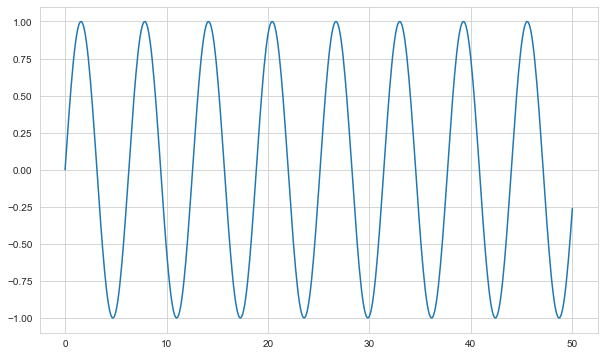

In [6]:
plt.plot(x,y);

Let's turn this into a DataFrame

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

In [9]:
len(df)

501

In [10]:
test_percent = 0.15

# datanin sirasini bozmak istemiyorum, bu sebeple train test split uygulamiyorum
# datanin son kismindan ayiririm

In [11]:
len(df)*test_percent

75.14999999999999

In [12]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

In [13]:
test_ind = int(len(df) - test_point)
test_ind

# 426'inci satir oncesi train datam, sonrasi test datam

426

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [17]:
train.shape

(426, 1)

In [16]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [18]:
test.shape

(75, 1)

### Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
# help(TimeseriesGenerator)

In [24]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

# ayni veri uzerinde train ve tahmin islemini yaptigim icin data ve target'a train_scaled
# verilir
# length = 2 ile train datasindan 2 data al 3'uncuyu tahmin et demek
# batch_size = 1 ile tek tek egitim yapmak istiyorum, her veriden sonra backpropagation yap
# stride = 1 ile ilk 3 veriyi al 4'uncuyu tahmin et, sonra bir kaydir, 3 veriyi al 4'u tahmin
# et demek

In [25]:
len(train_scaled)

426

In [26]:
len(generator) # = (len(train)-length)/(batch_size*stride) 

424

In [27]:
generator

In [28]:
generator[0]

# scaled train datamin ilk 2 satirini al 3'uncuyu tahmin et

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [29]:
# What does the first batch look like?
X, y = generator[0]

In [30]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


In [31]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

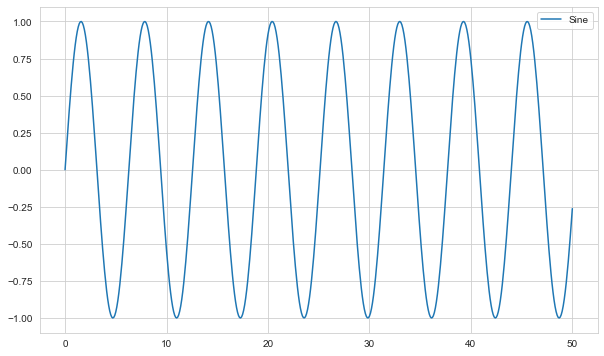

In [33]:
df.plot();

The more length the more training time

In [34]:
length = 64 # Length of the output sequences (in number of timesteps)
# 1 cycle ya da periyod 64 satir veri ile tamamlandigi icin length=64 seciyoruz
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, 
                                length = length, batch_size = batch_size)
# stride default olarak 1

In [35]:
# What does the first batch look like?
X, y = generator[0]

In [36]:
len(generator)

362

In [37]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

# many to one islemi

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [39]:
# We're only using one feature in our time series
n_features = 1

In [41]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))
# input_shape = 64 satir ve 1 sutunluk veri gelecek her tahmin icin

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

2022-03-17 20:23:15.461558: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [43]:
# params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2))

# lstm'de bastaki 1, 4 oluyor
# gru'da bastaki 1, 3 oluyor

10200

In [44]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
362/362 [==============================] - 6s 14ms/step - loss: 0.0145
Epoch 2/5
362/362 [==============================] - 5s 15ms/step - loss: 2.3404e-05
Epoch 3/5
362/362 [==============================] - 5s 15ms/step - loss: 1.4025e-04
Epoch 4/5
362/362 [==============================] - 6s 15ms/step - loss: 1.7533e-05
Epoch 5/5
362/362 [==============================] - 6s 16ms/step - loss: 7.8058e-05


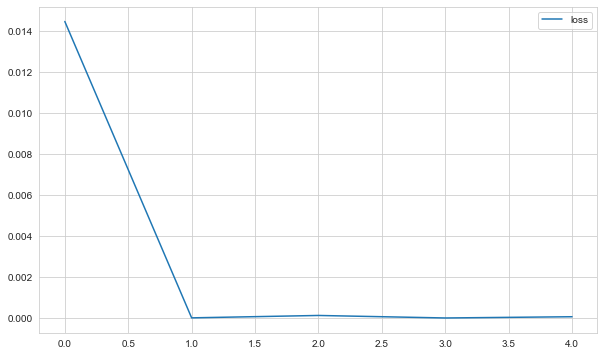

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# her yeni fit isleminde farkli random degerlerle basladigi icin farkli sonuclar alabilirim

## Evaluate on Test Data

In [47]:
first_eval_batch = train_scaled[-length:]

# scale edilmis train datamin en sondaki 64 satirini aliyorum

In [48]:
first_eval_batch.shape

(64, 1)

In [49]:
generator[0][0].shape

(1, 64, 1)

In [50]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)
# verileri modele verebilmek icin 3 boyutlu olmasi lazim, bunun icin boyutu duzenliyoruz

In [51]:
first_eval_batch.shape

(1, 64, 1)

In [52]:
model.predict(first_eval_batch)

# scaled train datamin son 64 verisini kullanarak tahmin ettim

array([[0.00981344]], dtype=float32)

In [53]:
test_scaled[0]

# yukaridaki 64 veri ile yaptigim tahminin gercek degeri test scaled datamin ilk satiri oluyor

array([0.00885189])

In [54]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [55]:
current_batch.shape

(1, 64, 1)

In [56]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [57]:
np.append(current_batch[:,1:,:], [[[0.00981344]]], axis = 1)

# kac feature var, satir, sutun

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [77]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [78]:
predictions_scaled

[array([0.00981344], dtype=float32),
 array([0.02084105], dtype=float32),
 array([0.03653079], dtype=float32),
 array([0.05675497], dtype=float32),
 array([0.08133938], dtype=float32),
 array([0.11034113], dtype=float32),
 array([0.14252545], dtype=float32),
 array([0.17768687], dtype=float32),
 array([0.21679014], dtype=float32),
 array([0.2583849], dtype=float32),
 array([0.30289495], dtype=float32),
 array([0.35013154], dtype=float32),
 array([0.39941198], dtype=float32),
 array([0.45146745], dtype=float32),
 array([0.50503886], dtype=float32),
 array([0.5591199], dtype=float32),
 array([0.6144363], dtype=float32),
 array([0.67004603], dtype=float32),
 array([0.7255312], dtype=float32),
 array([0.7801011], dtype=float32),
 array([0.8307268], dtype=float32),
 array([0.8788568], dtype=float32),
 array([0.92323494], dtype=float32),
 array([0.96298313], dtype=float32),
 array([0.9977796], dtype=float32),
 array([1.0259578], dtype=float32),
 array([1.0481948], dtype=float32),
 array([1.0

In [79]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

In [80]:
predictions = scaler.inverse_transform(predictions_scaled)

# scale'den kurtarmak icin bu islemi yapiyoruz

In [81]:
predictions

array([[-9.80363486e-01],
       [-9.58308439e-01],
       [-9.26929215e-01],
       [-8.86481179e-01],
       [-8.37312749e-01],
       [-7.79309714e-01],
       [-7.14941595e-01],
       [-6.44619318e-01],
       [-5.66413407e-01],
       [-4.83224527e-01],
       [-3.94205168e-01],
       [-2.99732743e-01],
       [-2.01172665e-01],
       [-9.70625440e-02],
       [ 1.00794022e-02],
       [ 1.18240580e-01],
       [ 2.28872588e-01],
       [ 3.40091102e-01],
       [ 4.51060589e-01],
       [ 5.60199513e-01],
       [ 6.61450064e-01],
       [ 7.57709244e-01],
       [ 8.46464854e-01],
       [ 9.25960600e-01],
       [ 9.95552994e-01],
       [ 1.05190897e+00],
       [ 1.09638250e+00],
       [ 1.13014683e+00],
       [ 1.14918369e+00],
       [ 1.15581858e+00],
       [ 1.15003269e+00],
       [ 1.13225038e+00],
       [ 1.10485416e+00],
       [ 1.06610597e+00],
       [ 1.01667075e+00],
       [ 9.59961677e-01],
       [ 8.94835781e-01],
       [ 8.23697016e-01],
       [ 7.4

In [82]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.980
42.700,-0.959,-0.958
42.800,-0.925,-0.927
42.900,-0.883,-0.886
43.000,-0.832,-0.837
...,...,...
49.600,-0.617,-0.680
49.700,-0.536,-0.619
49.800,-0.449,-0.548
49.900,-0.357,-0.469


In [83]:
test['RNN_Predictions'] = predictions

In [84]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.980
42.700,-0.959,-0.958
42.800,-0.925,-0.927
42.900,-0.883,-0.886
43.000,-0.832,-0.837
...,...,...
49.600,-0.617,-0.680
49.700,-0.536,-0.619
49.800,-0.449,-0.548
49.900,-0.357,-0.469


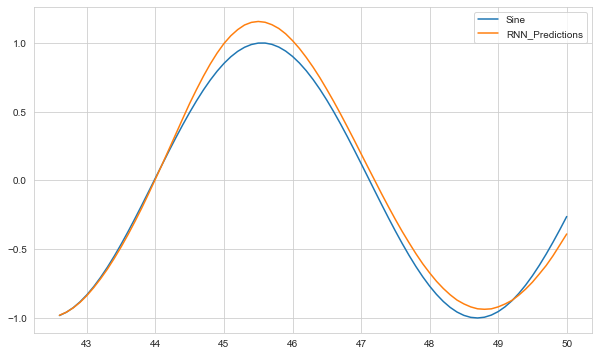

In [85]:
test.plot();

## Early Stopping and Validation Generator

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [88]:
length = 64 # length range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, 
                                length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, 
                                           length = length, batch_size = batch_size)

# early stop yapabilmek icin validation datasi uretiyoruz burada

In [89]:
len(validation_generator)

11

## LSTM

In [90]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [92]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [93]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 12s 28ms/step - loss: 0.0068 - val_loss: 1.2495e-05
Epoch 2/20
362/362 [==============================] - 11s 30ms/step - loss: 1.7636e-04 - val_loss: 9.7172e-06
Epoch 3/20
362/362 [==============================] - 14s 38ms/step - loss: 2.1743e-04 - val_loss: 9.0045e-06
Epoch 4/20
362/362 [==============================] - 14s 38ms/step - loss: 1.3796e-04 - val_loss: 4.7021e-06
Epoch 5/20
362/362 [==============================] - 17s 48ms/step - loss: 3.2851e-04 - val_loss: 8.4100e-05
Epoch 6/20
362/362 [==============================] - 14s 40ms/step - loss: 0.0028 - val_loss: 2.4196e-04


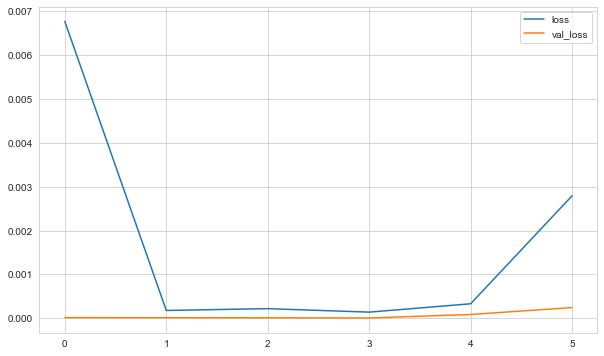

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [96]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [97]:
predictions = scaler.inverse_transform(predictions_scaled)
test['LSTM Predictions'] = predictions
test

,Sine,RNN_Predictions,LSTM Predictions
42.600,-0.982,-0.980,-1.022
42.700,-0.959,-0.958,-1.010
42.800,-0.925,-0.927,-0.992
42.900,-0.883,-0.886,-0.969
43.000,-0.832,-0.837,-0.939
...,...,...,...
49.600,-0.617,-0.680,-0.647
49.700,-0.536,-0.619,-0.758
49.800,-0.449,-0.548,-0.863
49.900,-0.357,-0.469,-0.962


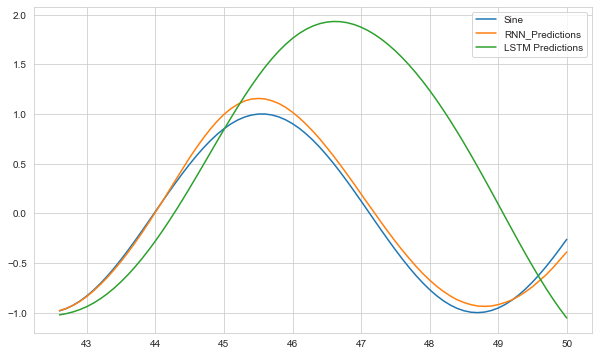

In [99]:
test.plot();

## Retrain and Forecasting

In [103]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [104]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, 
                                batch_size = 1)

In [105]:
model = Sequential()
model.add(LSTM(100, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 4)

Epoch 1/4
437/437 [==============================] - 14s 28ms/step - loss: 0.0093
Epoch 2/4
437/437 [==============================] - 12s 28ms/step - loss: 3.0185e-04
Epoch 3/4
437/437 [==============================] - 14s 31ms/step - loss: 7.8138e-05
Epoch 4/4
437/437 [==============================] - 14s 33ms/step - loss: 3.4816e-05


In [106]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [107]:
forecast = scaler.inverse_transform(forecast)

In [108]:
forecast

array([[-0.16243544],
       [-0.0618459 ],
       [ 0.04020061],
       [ 0.14266446],
       [ 0.24449436],
       [ 0.34463318],
       [ 0.44202543],
       [ 0.53563103],
       [ 0.62443981],
       [ 0.70748963],
       [ 0.78388203],
       [ 0.8528009 ],
       [ 0.91352407],
       [ 0.96543775],
       [ 1.00804245],
       [ 1.04095921],
       [ 1.06392851],
       [ 1.07680969],
       [ 1.07957079],
       [ 1.0722843 ],
       [ 1.05511854],
       [ 1.02832384],
       [ 0.99222684],
       [ 0.94721854],
       [ 0.89375134],
       [ 0.83232937],
       [ 0.76350754],
       [ 0.68788737],
       [ 0.60611618],
       [ 0.51889013],
       [ 0.42695285],
       [ 0.33109743],
       [ 0.23216727],
       [ 0.13105571],
       [ 0.0287057 ],
       [-0.07389846],
       [-0.1757345 ],
       [-0.27575589],
       [-0.37290419],
       [-0.46612689],
       [-0.55439646],
       [-0.63673029],
       [-0.71221301],
       [-0.78001342],
       [-0.8394025 ],
       [-0

In [109]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


<AxesSubplot:>

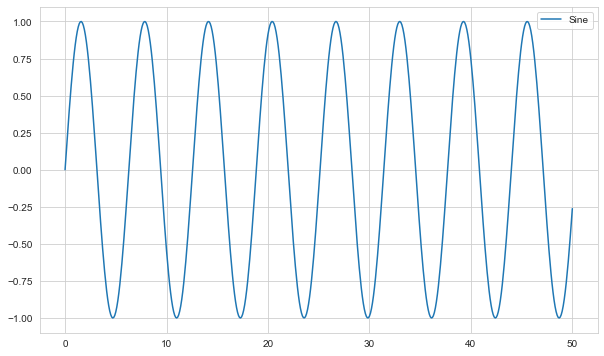

In [110]:
df.plot()

In [111]:
forecast_len = len(forecast)
forecast_len

64

In [112]:
step = 0.1

In [113]:
forecast_len * step

6.4

In [114]:
forecast_index = np.arange(50.1, 56.5, step = step)

# yeni index'im 50.1'den baslayacak 50.1 + 6.4 = 56.5'e kadar gidecek

In [115]:
len(forecast_index)

64

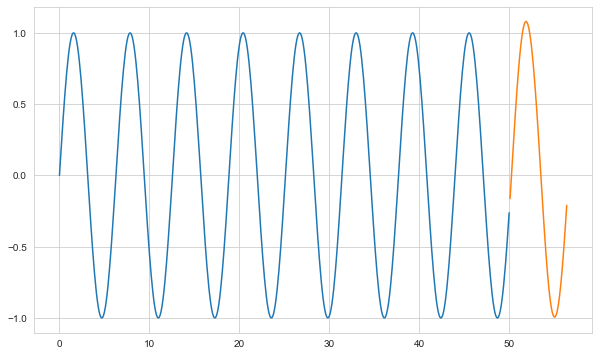

In [116]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___